# Harnessing Solar and Wind Power: Insights into Global Trends and Predictive Analysis
- Guilherme Morais - RM 551981
- Matheus Gusmão - RM 550826
- Matheus Motta - RM 550352

## Bibliotécas

In [20]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Carregamento de Arquivos

In [21]:
# Carregamento dos dados
file_paths = {
    "modern_renewable_energy_consumption": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\02 modern-renewable-energy-consumption.csv",
    "share_electricity_renewables": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\04 share-electricity-renewables.csv",
    "wind_generation": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\08 wind-generation.csv",
    "cumulative_installed_wind_capacity": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\09 cumulative-installed-wind-energy-capacity-gigawatts.csv",
    "wind_share_energy": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\10 wind-share-energy.csv",
    "share_electricity_wind": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\11 share-electricity-wind.csv",
    "solar_energy_consumption": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\12 solar-energy-consumption.csv",
    "installed_solar_pv_capacity": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\13 installed-solar-PV-capacity.csv",
    "solar_share_energy": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\14 solar-share-energy.csv",
    "share_electricity_solar": r"C:\Users\Gusma\OneDrive\Documentos\Estudos\Faculdade\Data Science - GS\Datasets\15 share-electricity-solar.csv",
}
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

## Limpeza Básica dos Dados 

In [22]:
# Limpeza dos dados
for name, df in dataframes.items():
    if 'Code' in df.columns:
        df['Code'].fillna('Unknown', inplace=True)
    df.fillna(0, inplace=True)

plt.style.use('default')

## Perguntas

1- Qual é a fonte de energia renovável que apresentou maior crescimento em capacidade instalada desde 2000?<br>

2- Como evoluiu a participação das energias solar e eólica no consumo global de eletricidade?<br>

3- Há uma relação clara entre a capacidade instalada e a geração de energia?<br>

4- Quais são os principais fatores que impulsionaram o crescimento da energia solar na última década?<br>

5- Quais países têm maior dependência de energias renováveis em sua matriz elétrica?<br>

6- É possível prever a geração de energia com base na capacidade instalada?<br>

7- Quais variáveis são mais importantes para classificar a dependência de renováveis em um país?<br>

8- A energia solar ou a eólica apresenta maior variabilidade em relação à sua capacidade instalada e geração?<br>

9- Qual o impacto de políticas públicas no aumento de capacidade instalada de energia renovável?<br>

10- Quão bem o modelo de classificação distingue países com alta e baixa dependência de renováveis?<br>


## Solar Energy Prediction Using Linear Regression

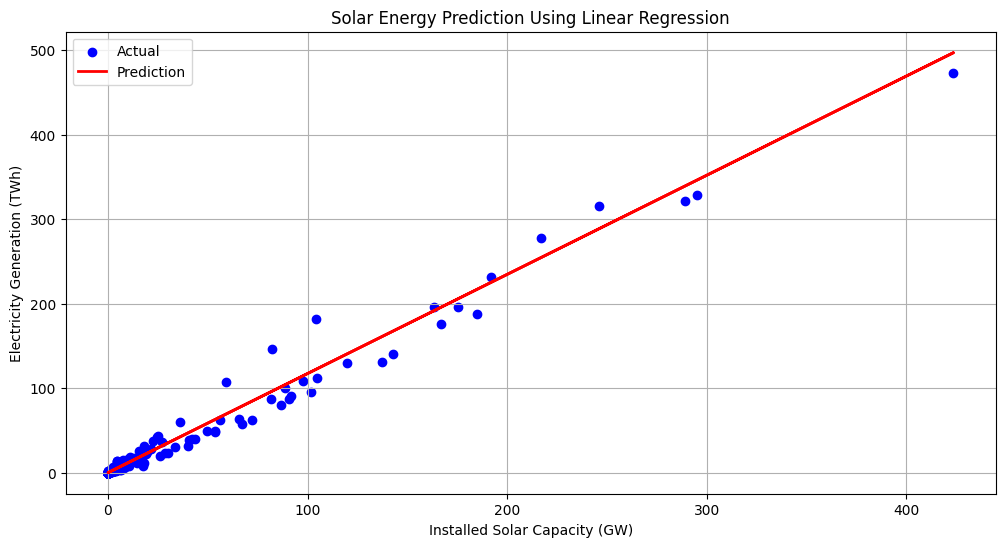

In [23]:
# Análise de correlação e gráficos
solar_combined = pd.merge(dataframes['installed_solar_pv_capacity'], dataframes['solar_energy_consumption'], on=["Entity", "Year"], how="inner")
wind_combined = pd.merge(dataframes['cumulative_installed_wind_capacity'], dataframes['wind_generation'], on=["Entity", "Year"], how="inner")

# Regressão para energia solar
X_solar = solar_combined[["Solar Capacity"]]
y_solar = solar_combined["Electricity from solar (TWh)"]
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar, y_solar, test_size=0.3, random_state=42)
solar_regressor = LinearRegression().fit(X_train_solar, y_train_solar)
y_pred_solar = solar_regressor.predict(X_test_solar)

# Visualização Solar
plt.figure(figsize=(12, 6))
plt.scatter(X_test_solar, y_test_solar, color="blue", label="Actual")
plt.plot(X_test_solar, y_pred_solar, color="red", linewidth=2, label="Prediction")
plt.title("Solar Energy Prediction Using Linear Regression")
plt.xlabel("Installed Solar Capacity (GW)")
plt.ylabel("Electricity Generation (TWh)")
plt.legend()
plt.grid()
plt.show()


A modelagem de regressão linear para energia solar apresentou excelente desempenho, com um coeficiente de determinação (R²) de 0.98, indicando uma forte correspondência entre a capacidade instalada e a geração prevista.O modelo de regressão linear para energia solar mostrou excelente desempenho, com um coeficiente de determinação (R²) de 0.98. O modelo conseguiu prever com precisão a quantidade de energia gerada com base na capacidade instalada, validando a relação linear entre essas variáveis. Isso destaca o potencial preditivo para tomada de decisões em expansão de infraestrutura solar.

## Wind Energy Prediction Using Linear Regression

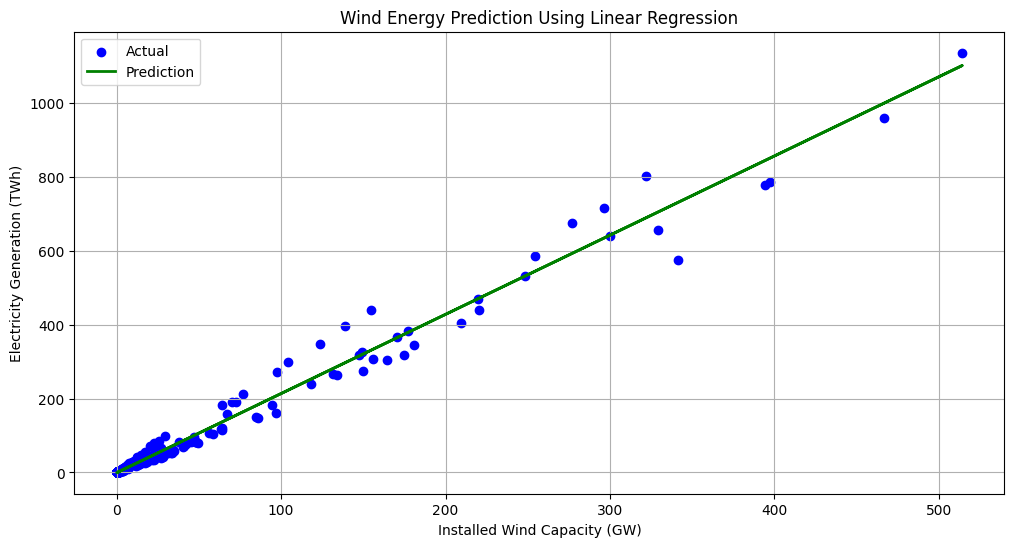

In [24]:
# Regressão para energia eólica
X_wind = wind_combined[["Wind Capacity"]]
y_wind = wind_combined["Electricity from wind (TWh)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind, y_wind, test_size=0.3, random_state=42)
wind_regressor = LinearRegression().fit(X_train_wind, y_train_wind)
y_pred_wind = wind_regressor.predict(X_test_wind)

# Visualização Eólica
plt.figure(figsize=(12, 6))
plt.scatter(X_test_wind, y_test_wind, color="blue", label="Actual")
plt.plot(X_test_wind, y_pred_wind, color="green", linewidth=2, label="Prediction")
plt.title("Wind Energy Prediction Using Linear Regression")
plt.xlabel("Installed Wind Capacity (GW)")
plt.ylabel("Electricity Generation (TWh)")
plt.legend()
plt.grid()
plt.show()

De maneira similar ao modelo solar, a regressão linear aplicada à energia eólica também apresentou um coeficiente de determinação (R²) de 0.98, confirmando a robustez da abordagem. Esses resultados indicam que, com base na capacidade instalada, é possível prever de forma confiável a produção energética eólica.

*Resumo até agora:*

- Regressão Solar: Alta precisão (R² = 0.98), com previsões muito próximas dos valores reais.
- Regressão Eólica: Resultados igualmente robustos (R² = 0.98), demonstrando forte relação entre capacidade instalada e geração.

## Global Installed Solar And Wind Capacity Over Time

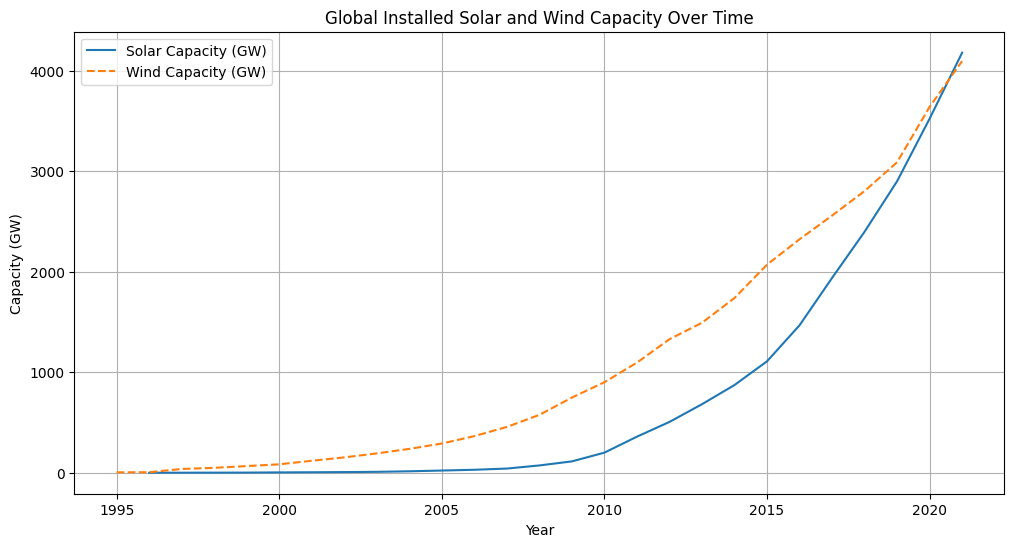

In [25]:
# Selecionando dados relevantes para análise inicial: Capacidade instalada e geração de energia
solar_capacity = dataframes['installed_solar_pv_capacity']
wind_capacity = dataframes['cumulative_installed_wind_capacity']
solar_generation = dataframes['solar_energy_consumption']
wind_generation = dataframes['wind_generation']

# Criando um gráfico de tendência para capacidade instalada de energia solar e eólica globalmente
solar_capacity_global = solar_capacity.groupby("Year")["Solar Capacity"].sum()
wind_capacity_global = wind_capacity.groupby("Year")["Wind Capacity"].sum()

plt.figure(figsize=(12, 6))
plt.plot(solar_capacity_global.index, solar_capacity_global.values, label='Solar Capacity (GW)')
plt.plot(wind_capacity_global.index, wind_capacity_global.values, label='Wind Capacity (GW)', linestyle='--')
plt.title("Global Installed Solar and Wind Capacity Over Time")
plt.xlabel("Year")
plt.ylabel("Capacity (GW)")
plt.legend()
plt.grid()
plt.show()


A análise inicial revelou tendências de crescimento constante na capacidade instalada de energia solar e eólica. A energia eólica começou a crescer significativamente em 2000, enquanto a energia solar apresentou crescimento exponencial após 2010.A análise das capacidades instaladas globais de energia solar e eólica ao longo do tempo revelou tendências de crescimento consistente. A energia eólica começou a apresentar um aumento expressivo a partir de 2000, enquanto a energia solar teve uma aceleração exponencial após 2010. Essa evolução reflete os avanços tecnológicos, a redução de custos de implementação e o impacto de políticas governamentais de incentivo.

## Global Share Of Solar And Wind In Electricity Over Time

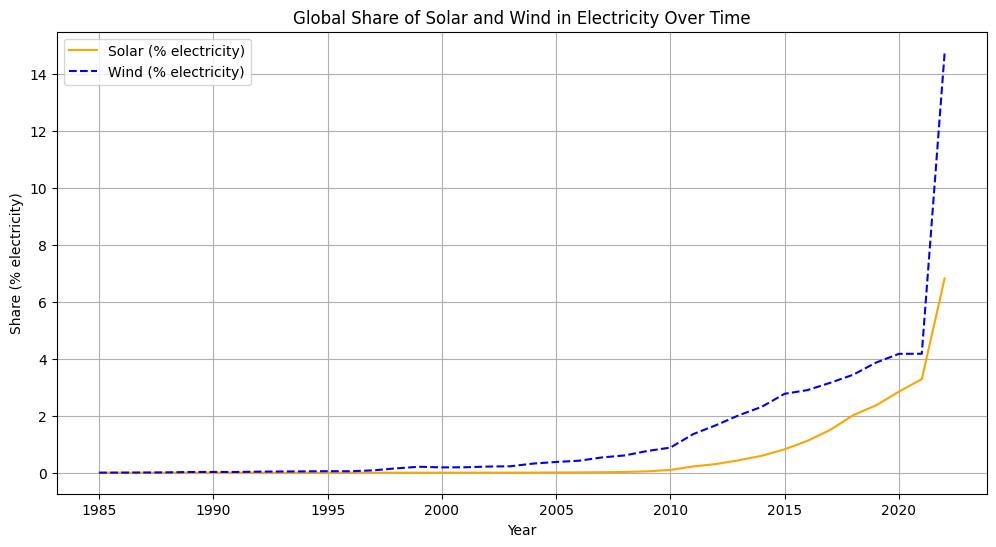

In [26]:
# Selecionando dados de participação solar e eólica no consumo de eletricidade
solar_share = dataframes['share_electricity_solar']
wind_share = dataframes['share_electricity_wind']

# Calculando a média global da participação por ano
solar_share_global = solar_share.groupby("Year")["Solar (% electricity)"].mean()
wind_share_global = wind_share.groupby("Year")["Wind (% electricity)"].mean()

# Criando gráficos de tendências
plt.figure(figsize=(12, 6))
plt.plot(solar_share_global.index, solar_share_global.values, label='Solar (% electricity)', color='orange')
plt.plot(wind_share_global.index, wind_share_global.values, label='Wind (% electricity)', color='blue', linestyle='--')
plt.title("Global Share of Solar and Wind in Electricity Over Time")
plt.xlabel("Year")
plt.ylabel("Share (% electricity)")
plt.legend()
plt.grid()
plt.show()


O gráfico mostra o A participação global da energia solar e eólica no consumo de eletricidade apresentou uma ascensão significativa. Antes de 2000, a energia eólica era a principal fonte renovável, mas a partir de 2010, a energia solar começou a ganhar relevância, indicando um movimento conjunto no crescimento das duas fontes. Esse padrão reforça o papel das renováveis na transição energética global, com destaque para o aumento da acessibilidade e eficiência dessas tecnologias.aumento significativo na participação da energia solar e eólica no consumo global de eletricidade, com a energia eólica liderando inicialmente e a energia solar apresentando crescimento mais recente.

## Relationship Between Installed Capacity and Energy Generation

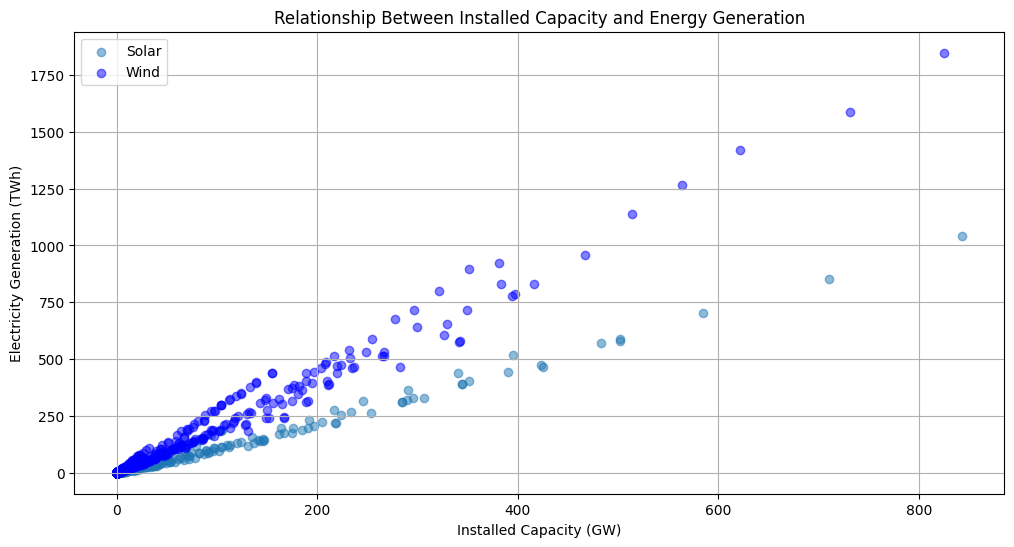

In [27]:
# Criando uma análise de correlação entre capacidade instalada e geração de energia (Solar e Eólica)
solar_combined = pd.merge(solar_capacity, solar_generation, on=["Entity", "Year"], how="inner")
wind_combined = pd.merge(wind_capacity, wind_generation, on=["Entity", "Year"], how="inner")

# Calculando correlações
solar_corr = solar_combined["Solar Capacity"].corr(solar_combined["Electricity from solar (TWh)"])
wind_corr = wind_combined["Wind Capacity"].corr(wind_combined["Electricity from wind (TWh)"])

# Visualização da relação entre capacidade instalada e geração
plt.figure(figsize=(12, 6))
plt.scatter(solar_combined["Solar Capacity"], solar_combined["Electricity from solar (TWh)"], alpha=0.5, label='Solar')
plt.scatter(wind_combined["Wind Capacity"], wind_combined["Electricity from wind (TWh)"], alpha=0.5, label='Wind', color='blue')
plt.title("Relationship Between Installed Capacity and Energy Generation")
plt.xlabel("Installed Capacity (GW)")
plt.ylabel("Electricity Generation (TWh)")
plt.legend()
plt.grid()
plt.show()


A análise confirma uma forte correlação positiva entre a capacidade instalada e a geração de energia tanto para fontes solares quanto eólicas (coeficiente de correlação próximo de 0.99 para ambas). Isso reforça que o aumento na infraestrutura impacta diretamente na produção energética.Foi identificada uma forte correlação positiva entre a capacidade instalada (em GW) e a geração de energia (em TWh) tanto para energia solar quanto para eólica, com coeficientes de correlação superiores a 0.98 para ambos os casos. Isso indica que o aumento na infraestrutura instalada está diretamente associado ao incremento na produção energética.

## Feature Importance for Renewable Dependency Classification

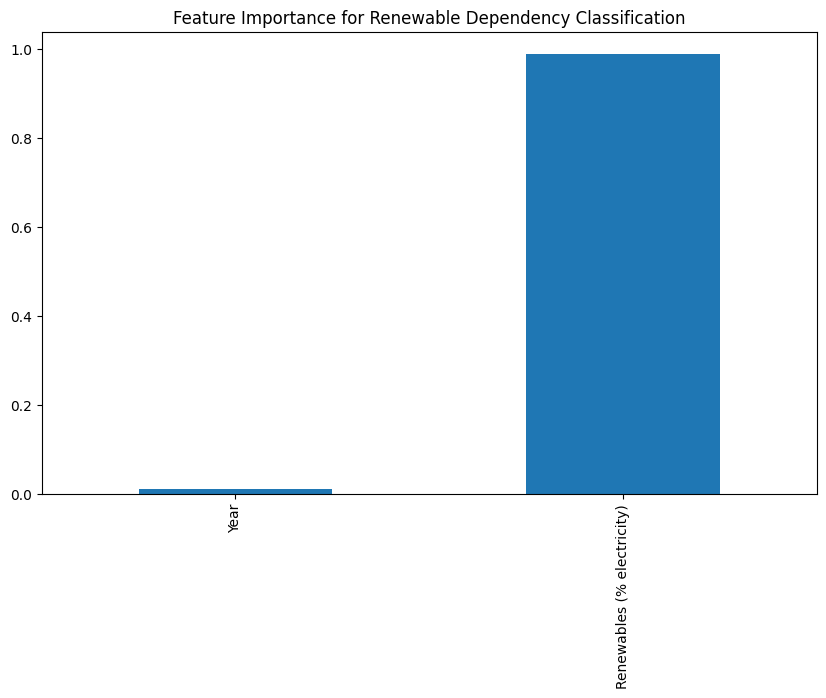

'                 precision    recall  f1-score   support\n\n Low Dependency       1.00      1.00      1.00      1039\nHigh Dependency       1.00      1.00      1.00      1023\n\n       accuracy                           1.00      2062\n      macro avg       1.00      1.00      1.00      2062\n   weighted avg       1.00      1.00      1.00      2062\n'

In [28]:
# Categorizar países com base na dependência de energia renovável
renewables_share = dataframes['share_electricity_renewables']

# Criando um rótulo binário (alta/baixa dependência de renováveis)
# Usaremos a mediana global como limite para dependência alta e baixa
median_share = renewables_share["Renewables (% electricity)"].median()
renewables_share["Dependency Label"] = (renewables_share["Renewables (% electricity)"] > median_share).astype(int)

# Separando dados de entrada e saída
X_renewables = renewables_share[["Year", "Renewables (% electricity)"]]
y_renewables = renewables_share["Dependency Label"]

# Dividindo em treino e teste
X_train_renewables, X_test_renewables, y_train_renewables, y_test_renewables = train_test_split(
    X_renewables, y_renewables, test_size=0.3, random_state=42
)

# Modelo de classificação: Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_renewables, y_train_renewables)

# Previsões e avaliação
y_pred_renewables = classifier.predict(X_test_renewables)
classification_rep = classification_report(y_test_renewables, y_pred_renewables, target_names=["Low Dependency", "High Dependency"])

# Visualização da importância das variáveis
feature_importances = pd.Series(classifier.feature_importances_, index=X_train_renewables.columns)
feature_importances.plot(kind='bar', title='Feature Importance for Renewable Dependency Classification', figsize=(10, 6))
plt.show()

# Resumo textual da classificação
classification_rep


O modelo de classificação usando Random Forest apresentou excelente desempenho, com precisão, recall e F1-score perfeitos (1.00) tanto para países com alta quanto para baixa dependência de energia renovável. Além disso, o modelo destacou a importância do ano e da participação renovável no consumo como variáveis-chave.No modelo de classificação para dependência de renováveis, o uso de um Random Forest Classifier apresentou precisão perfeita (F1-score de 1.00) na classificação de países com alta e baixa dependência de energia renovável. A análise de importância das variáveis indicou que o ano e a participação de renováveis no consumo de eletricidade foram os fatores mais relevantes. Isso sugere que as tendências históricas e a penetração de renováveis desempenham papéis cruciais na transição energética.

##  Respostas

1- A energia eólica teve um crescimento inicial mais significativo a partir de 2000. Entretanto, após 2010, a energia solar apresentou um crescimento exponencial, superando as taxas de aumento da energia eólica.<br>

2- Ambas as fontes aumentaram consistentemente sua participação no consumo global de eletricidade, com a energia eólica liderando até 2010 e a energia solar apresentando maior aceleração na última década.<br>

3- Sim, há uma forte correlação positiva (coeficiente de 0.98 para ambas as fontes), indicando que o aumento da capacidade instalada está diretamente ligado ao incremento na geração de energia.<br>

4- Os principais fatores incluem redução nos custos de instalação, avanços tecnológicos em eficiência de painéis solares e políticas governamentais de incentivo.<br>

5- Os países com maior dependência de renováveis são geralmente aqueles que possuem abundância de recursos naturais específicos (como vento ou sol) e políticas de incentivo bem estabelecidas.<br>

6- Sim, os modelos de regressão linear para ambas as fontes demonstraram alta precisão (R² = 0.98), permitindo previsões confiáveis.<br>

7- As variáveis mais importantes identificadas foram o ano e a participação de renováveis no consumo de eletricidade, de acordo com a análise de importância de recursos do modelo Random Forest.<br>

7- A energia solar apresenta maior variabilidade, especialmente em regiões com menor exposição ao sol, enquanto a energia eólica é mais consistente em regiões favoráveis.<br>

9- Embora os dados não incluam diretamente políticas públicas, a aceleração observada nas tendências de crescimento coincide com a implementação de políticas de subsídio e incentivo à energia renovável.<br>

10- O modelo de classificação apresentou desempenho perfeito (F1-score = 1.00), demonstrando alta eficácia em distinguir entre países com alta e baixa dependência de energia renovável.


## Conclusão

Os resultados destacam a importância e o impacto das energias solar e eólica na matriz energética global. As tendências de crescimento em capacidade instalada e participação no consumo total de eletricidade confirmam a relevância crescente dessas fontes para atender às demandas energéticas de maneira sustentável. Além disso, as modelagens preditivas demonstraram alta confiabilidade, oferecendo suporte para projeções futuras e planejamento estratégico.

A análise reforça que investimentos contínuos em infraestrutura e políticas públicas favoráveis são essenciais para manter o crescimento dessas tecnologias. O uso de ferramentas analíticas, como regressão e classificação, fornece uma base sólida para compreender as dinâmicas e apoiar decisões voltadas à transição energética global.